In [46]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter

In [22]:
##8 jan to 12 jan 2021
fog_jan_1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/jan/08_01_12_01/eddypro_csat_full_output_2021-10-25T224122_exp.csv',
                       header= [1,2])
fog_jan_1.columns = fog_jan_1.columns.map('_'.join)
## 2 feb
fog_feb_1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/02_02_06_02/eddypro_csat_full_output_2021-10-25T195053_exp.csv',
                       header= [1,2])
fog_feb_1.columns = fog_feb_1.columns.map('_'.join)
## 20 feb
fog_feb_2 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/17_02_21_02/eddypro_csat_full_output_2021-10-25T210715_exp.csv',
                       header= [1,2])
fog_feb_2.columns = fog_feb_2.columns.map('_'.join)
#november
fog_nov = pd.read_csv('/Users/varungandhi/Desktop/data_exp1/gill/gill_result_2102130529.csv')

In [23]:
fog_jan_1['TIMESTAMP'] = fog_jan_1['date_[yyyy-mm-dd]'].astype(str)+" "+ fog_jan_1['time_[HH:MM]'].astype(str)
fog_feb_1['TIMESTAMP'] = fog_feb_1['date_[yyyy-mm-dd]'].astype(str)+" "+ fog_feb_1['time_[HH:MM]'].astype(str)
fog_feb_2['TIMESTAMP'] = fog_feb_2['date_[yyyy-mm-dd]'].astype(str)+" "+ fog_feb_2['time_[HH:MM]'].astype(str)

In [24]:
fog_nov_1 = fog_nov[(fog_nov.iloc[:,1] >= '23.11.2020 00:00')&
                    (fog_nov.iloc[:,1] <= '26.11.2020 00:00')]
fog_nov_2 = fog_nov[(fog_nov.iloc[:,1] >= '28.11.2020 00:00')&
                    (fog_nov.iloc[:,1] <= '30.11.2020 00:00')]

fog_nov_1.reset_index(inplace= True)
fog_nov_2.reset_index(inplace= True)
fog_nov_1.iloc[:,2] = pd.to_datetime(fog_nov_1.iloc[:,2],format = '%d.%m.%Y %H:%M')
fog_nov_2.iloc[:,2] = pd.to_datetime(fog_nov_2.iloc[:,2],format = '%d.%m.%Y %H:%M')

def replace(df):
    df1 = df.copy()
    x = df1.columns
    for column in x:
        for i in range(len(df1.index)):
            if type(df1[column][i]) == np.float64:
                
                if df1[column][i] <= -9999.:
                    df1[column][i] = float('NAN')
            
    return df1
                


/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5706/358825109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fog_nov_1.iloc[:,2] = pd.to_datetime(fog_nov_1.iloc[:,2],format = '%d.%m.%Y %H:%M')
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_5706/358825109.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fog_nov_2.iloc[:,2] = pd.to_datetime(fog_nov_2.iloc[:,2],format = '%d.%m.%Y %H:%M')


In [25]:
fog_jan_1 = fog_jan_1[(fog_jan_1['TIMESTAMP'] >= '2021-01-10 00:00') & 
                      (fog_jan_1['TIMESTAMP'] <= '2021-01-13 00:00')]
fog_feb_1 = fog_feb_1[(fog_feb_1['TIMESTAMP'] >= '2021-02-02 00:00') & 
                      (fog_feb_1['TIMESTAMP'] <= '2021-02-04 09:00')]
fog_feb_2 = fog_feb_2[(fog_feb_2['TIMESTAMP'] >= '2021-02-19 00:00') & 
                      (fog_feb_2['TIMESTAMP'] <= '2021-02-21 12:00')]
fog_jan_1.reset_index(inplace = True)
fog_feb_1.reset_index(inplace = True)
fog_feb_2.reset_index(inplace = True)


fog_jan_1['TIMESTAMP'] = pd.to_datetime(fog_jan_1['TIMESTAMP'],format='%Y-%m-%d %H:%M')
fog_feb_1['TIMESTAMP'] = pd.to_datetime(fog_feb_1['TIMESTAMP'],format='%Y-%m-%d %H:%M')
fog_feb_2['TIMESTAMP'] = pd.to_datetime(fog_feb_2['TIMESTAMP'],format='%Y-%m-%d %H:%M')

In [26]:
##12 jan fog 
def find_fog(df,v1,v2):
    for i in df.columns:
        if i == 'TIMESTAMP':
            
            arr = df['TIMESTAMP'].values
            arr = np.datetime_as_string(arr, unit = 'm')
            t_1 = np.where(arr == v1[0:10]+'T'+v1[11:])[0][0]
            t_2 = np.where(arr == v2[0:10]+'T'+v2[11:])[0][0]
            t_1 = df['TIMESTAMP'][t_1]
            t_2 = df['TIMESTAMP'][t_2]
        
        if i == 'T_end          ':
                                  
                                                                                                      
            arr = df.iloc[:,2].values
            arr = np.datetime_as_string(arr, unit = 'm')
            t_1 = np.where(arr == v1[0:10]+'T'+v1[11:])[0][0]
            t_2 = np.where(arr == v2[0:10]+'T'+v2[11:])[0][0]
            t_1 = df.iloc[:,2][t_1]
            t_2 = df.iloc[:,2][t_2]
                                  

    

    return t_1,t_2

a,b = find_fog(fog_jan_1,v1 = '2021-01-12 04:00', v2 = '2021-01-12 07:30')
c,d = find_fog(fog_feb_1,v1 = '2021-02-02 17:00', v2 = '2021-02-03 10:00')
e,f = find_fog(fog_feb_2,v1 = '2021-02-20 04:00', v2 = '2021-02-20 08:00')

a1,b1 = find_fog(fog_nov_1,v1 = '2020-11-24 09:00', v2 = '2020-11-24 22:30')
a2,b2 = find_fog(fog_nov_2,v1 = '2020-11-29 01:00', v2 = '2020-11-29 08:30')


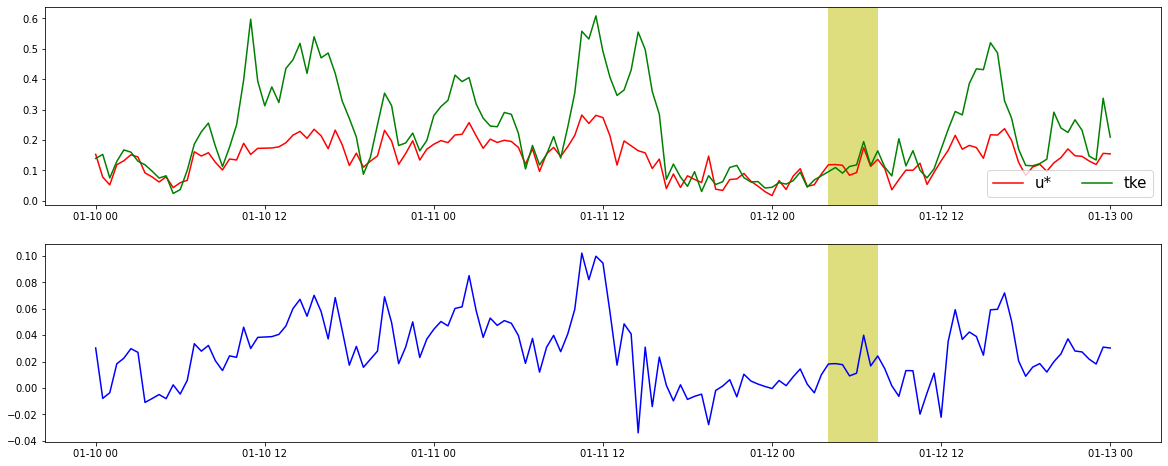

In [27]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,8),sharex= False)
ax1.axvspan(a, b, color='y', alpha=0.5, lw=0)
ax1.plot(fog_jan_1['TIMESTAMP'], fog_jan_1['u*_[m+1s-1]'], label = 'u*', color = 'r')
ax1.plot(fog_jan_1['TIMESTAMP'], fog_jan_1['TKE_[m+2s-2]'], label = 'tke', color = 'g')
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)

ax2.axvspan(a, b, color='y', alpha=0.5, lw=0)
ax2.plot(fog_jan_1['TIMESTAMP'], -fog_jan_1['Tau_[kg+1m-1s-2]'], label = 'tau', color = 'b')

#ax1_1 = ax1.twinx()
#ax1_1.plot(fog_jan_1['TIMESTAMP'], fog_jan_1['wind_speed_[m+1s-1]'], label = 'u*', color = 'brown')

#ax1.plot(time6, j_m['r_9'] [t11:t12], label = 'rh (9m)', color = 'b',       marker = 'o')
#ax1.plot(time6, j_m['r_24'][t11:t12], label = 'rh (24m)', color = 'orange',marker = 'o')
#ax1.set_ylim([70,101])
#ax1.set_yticks(np.arange(70,101,10))
#ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)
#ax1.set_ylabel('Relative Humidity(%)', fontsize=20, labelpad =15 )

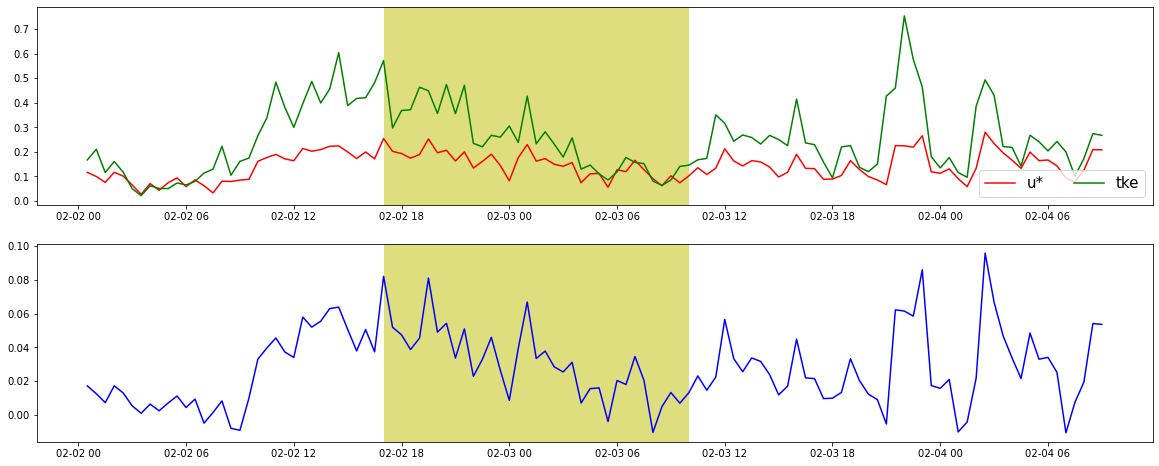

In [28]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,8),sharex= False)
ax1.axvspan(c, d, color='y', alpha=0.5, lw=0)
ax1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['u*_[m+1s-1]'], label = 'u*', color = 'r')
ax1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['TKE_[m+2s-2]'], label = 'tke', color = 'g')
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)

ax2.axvspan(c, d, color='y', alpha=0.5, lw=0)
ax2.plot(fog_feb_1['TIMESTAMP'], -fog_feb_1['Tau_[kg+1m-1s-2]'], label = 'tau', color = 'b')


#ax1_1 = ax1.twinx()
#ax1_1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['wind_speed_[m+1s-1]'], label = 'u*', color = 'brown')

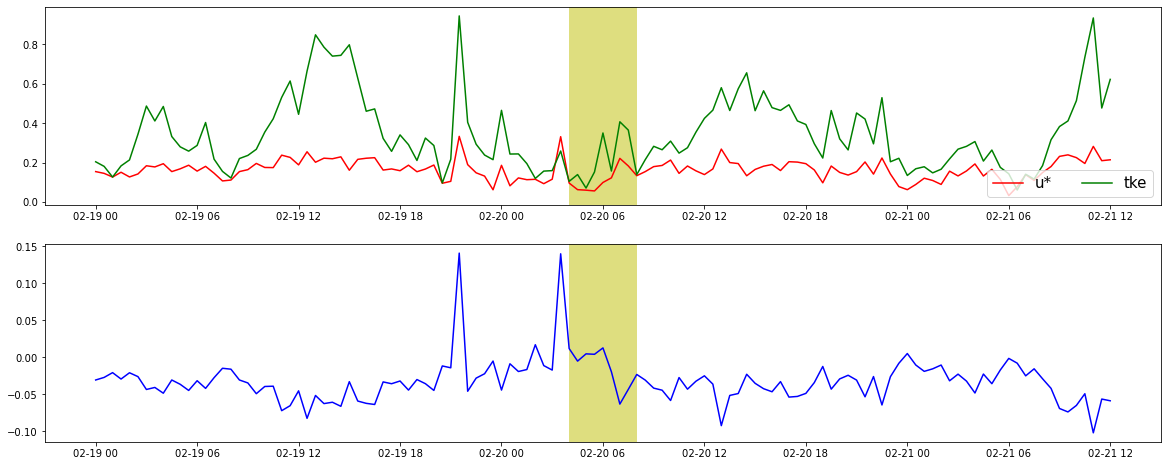

In [29]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,8),sharex= False)
ax1.axvspan(e, f, color='y', alpha=0.5, lw=0)
ax1.plot(fog_feb_2['TIMESTAMP'], fog_feb_2['u*_[m+1s-1]'] , label = 'u*' , color = 'r')
ax1.plot(fog_feb_2['TIMESTAMP'], fog_feb_2['TKE_[m+2s-2]'], label = 'tke', color = 'g')
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)

ax2.axvspan(e, f, color='y', alpha=0.5, lw=0)
ax2.plot(fog_feb_2['TIMESTAMP'], fog_feb_2['Tau_[kg+1m-1s-2]'], label = 'tau', color = 'b')


#ax1_1 = ax1.twinx()
#ax1_1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['wind_speed_[m+1s-1]'], label = 'u*', color = 'brown')

In [34]:
#f_nov_1 = replace(fog_nov_1)
#f_nov_2 = replace(fog_nov_2)
nov_30 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/nov/eddy_out/eddypro_csat_full_output_2022-03-11T140658_exp.csv',
                    header=[1,2])
nov_30.columns = nov_30.columns.map('_'.join)
nov_30['TIMESTAMP']  = nov_30['date_[yyyy-mm-dd]'].astype(str)+" "+ nov_30['time_[HH:MM]'].astype(str)
nov_30['TIMESTAMP']  = pd.to_datetime(nov_30['TIMESTAMP'])

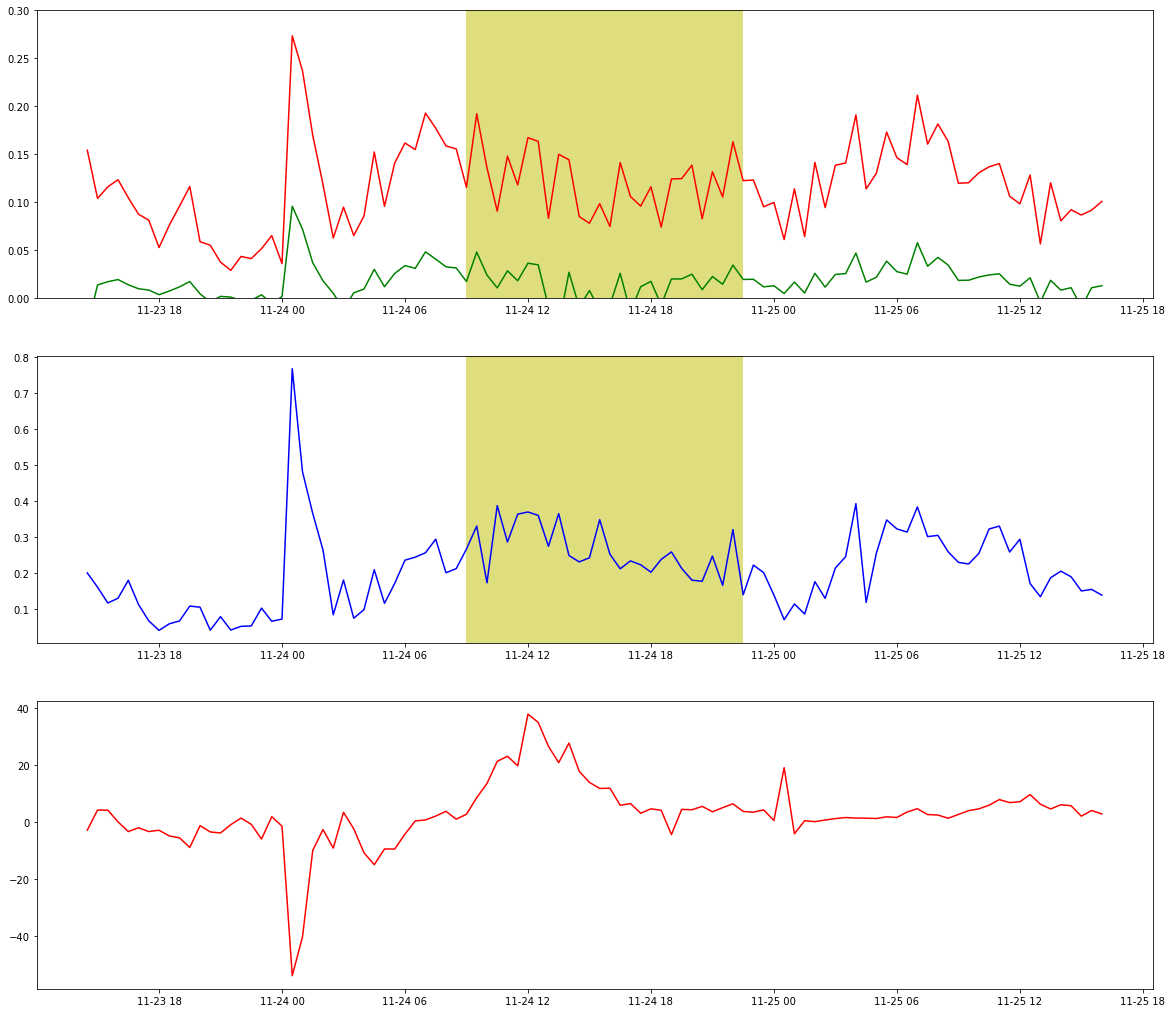

In [48]:
%matplotlib inline
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,18),sharex= False)
ax1.axvspan(a1, b1, color='y', alpha=0.5, lw=0)
ax1.plot(nov_30['TIMESTAMP'][100:200], nov_30['u*_[m+1s-1]'][100:200], label = 'u*' , color = 'r')
ax1.plot(nov_30['TIMESTAMP'][100:200], -nov_30['Tau_[kg+1m-1s-2]'][100:200], label = 'tau', color = 'g')
#ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)

ax2.axvspan(a1, b1, color='y', alpha=0.5, lw=0)
ax2.plot(nov_30['TIMESTAMP'][100:200], nov_30['TKE_[m+2s-2]'][100:200], label = 'tau', color = 'b')
ax1.set_ylim([0,0.3])

ax3.plot(nov_30['TIMESTAMP'][100:200], nov_30['H_[W+1m-2]'][100:200], label = 'u*' , color = 'r')


#ax1_1 = ax1.twinx()
#ax1_1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['wind_speed_[m+1s-1]'], label = 'u*', color = 'brown')

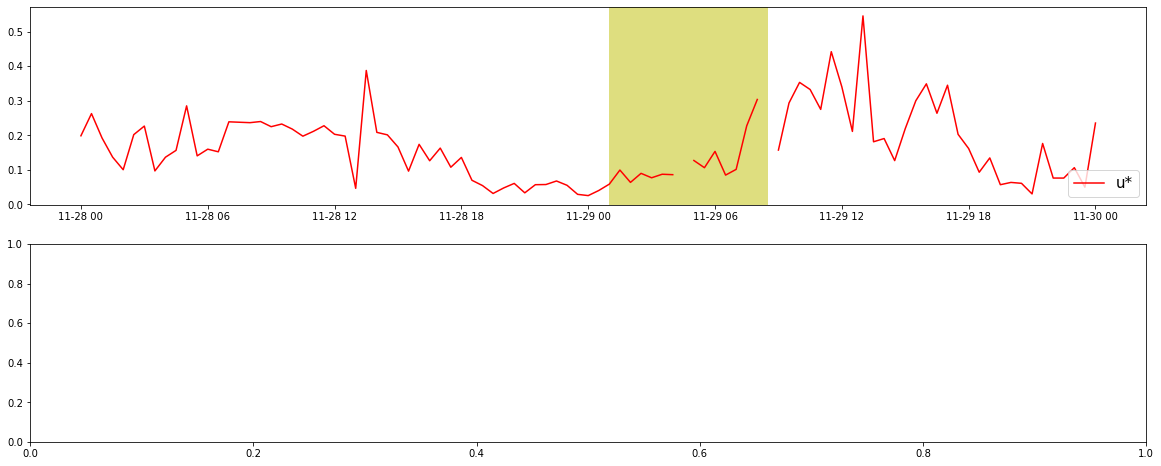

In [18]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,8),sharex= False)
ax1.axvspan(a2, b2, color='y', alpha=0.5, lw=0)
ax1.plot(f_nov_2.iloc[:,2], f_nov_2['ustar[m/s]     '] , label = 'u*' , color = 'r')
#ax1.plot(fog_nov_1.iloc[:,2], fog_nov_1['TKE_[m+2s-2]'], label = 'tke', color = 'g')
ax1.legend(loc= 'lower right', prop={'size': 15}, ncol = 5)

#ax2.axvspan(a1, b1, color='y', alpha=0.5, lw=0)
#ax2.plot(fog_nov_1.iloc[:,2], fog_nov_1['Tau_[kg+1m-1s-2]'], label = 'tau', color = 'b')


#ax1_1 = ax1.twinx()
#ax1_1.plot(fog_feb_1['TIMESTAMP'], fog_feb_1['wind_speed_[m+1s-1]'], label = 'u*', color = 'brown')

In [83]:
dti = pd.DatetimeIndex(['2014-10-06 17:59:40.01',
                       '2014-10-06 17:59:41.77',
                       '2014-10-06 17:59:43.00',
                       '2014-10-06 17:59:44.79',
                       '2014-10-06 17:59:48.74'])
X = pd.DataFrame({'data' :[20,35,80,120,180], 'time' :dti})

In [81]:
y = pd.Series(X.data)
y.index = X.time
z = y.resample('2.5S').mean()
z = z.fillna(z.mean())

In [82]:
z.diff()

time
2014-10-06 17:59:40.000     NaN
2014-10-06 17:59:42.500    72.5
2014-10-06 17:59:45.000     2.5
2014-10-06 17:59:47.500    77.5
Freq: 2500L, Name: data, dtype: float64

In [125]:
dte = pd.DataFrame({'height': [139,172,206,214,264,389],
                   'rh':[96,71,66,62,61,59]})



In [126]:
dte = (dte.set_index('height')
        .reindex(range(dte.height.min(), dte.height.max()))
      .interpolate().reset_index())
dte

,height,rh
0,139,96.000000
1,140,95.242424
2,141,94.484848
3,142,93.727273
4,143,92.969697
...,...,...
245,384,61.000000
246,385,61.000000
247,386,61.000000
248,387,61.000000


In [127]:
x = dte['rh'].ffill()

In [128]:
x

0      96.000000
1      95.242424
2      94.484848
3      93.727273
4      92.969697
         ...    
245    61.000000
246    61.000000
247    61.000000
248    61.000000
249    61.000000
Name: rh, Length: 250, dtype: float64

In [32]:
fog_nov_1.columns

Index(['index', 'T_begin        ', 'T_end          ', 'u[m/s]         ',
       'v[m/s]         ', 'w[m/s]         ', 'Ts[degC]       ',
       'Tp[degC]       ', 'H2O[mmol/mol]  ', 'CO2[umol/mol]  ',
       'T_ref[degC]    ', 'a_ref[g/m2]    ', 'p_ref[hPa]     ',
       'Var[u]         ', 'Var[v]         ', 'Var[w]         ',
       'Var[Ts]        ', 'Var[Tp]        ', 'Var[a]         ',
       'Var[CO2]       ', 'Cov[u'v']      ', 'Cov[v'w']      ',
       'Cov[u'w']      ', 'Cov[u'Ts']     ', 'Cov[v'Ts']     ',
       'Cov[w'Ts']     ', 'Cov[u'Tp']     ', 'Cov[v'Tp']     ',
       'Cov[w'Tp']     ', 'Cov[u'H2O']    ', 'Cov[v'H2O']    ',
       'Cov[w'H2O']    ', 'Cov[u'CO2']    ', 'Cov[v'CO2']    ',
       'Cov[w'CO2']    ', '         Nvalue', 'dir[deg]       ',
       'ustar[m/s]     ', 'HTs[W/m2]      ', 'HTp[W/m2]      ',
       'LvE[W/m2]      ', 'z/L            ', 'z/L-virt       ',
       'Flag(ustar)    ', 'Flag(HTs)      ', 'Flag(HTp)      ',
       'Flag(LvE)      ', 'Flag

In [93]:
#5 minutes fluxes
flux_30_tk3 = pd.read_csv('/Volumes/Seagate Backup Plus Drive/gill_result_2203270148.csv', header = 0)
df1min = pd.read_pickle('/Users/varungandhi/Desktop/data_1/Data_ELTE_1min.pkl')

In [94]:
flux_30_tk3 = flux_30_tk3.rename(columns={'T_end          ': 'TIMESTAMP'})

In [95]:
flux_30_tk3['TIMESTAMP'] = pd.to_datetime(flux_30_tk3['TIMESTAMP'])

In [96]:
flux_30_tk3 = flux_30_tk3[(flux_30_tk3['TIMESTAMP']>= '2020-11-23 00:00')&
                         (flux_30_tk3['TIMESTAMP'] <= '2020-11-26 00:00')]

In [97]:
##8 jan to 12 jan 2021
tau_jan1= pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/jan/08_01_12_01/eddy_5min/eddypro_csat_full_output_2022-03-18T152936_exp.csv',
                       header= [1,2])
tau_jan1.columns = tau_jan1.columns.map('_'.join)
## 2 feb
tau_feb1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/02_02_06_02/eddy_5min/eddypro_csat_full_output_2022-03-18T152755_exp.csv',
                       header= [1,2])
tau_feb1.columns = tau_feb1.columns.map('_'.join)
## 20 feb
tau_feb1a = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/17_02_21_02/eddy_5min/eddypro_csat_full_output_2022-03-18T152825_exp.csv',
                       header= [1,2])
tau_feb1a.columns = tau_feb1a.columns.map('_'.join)

tau_nov1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/nov/eddy_out_5/eddypro_csat_full_output_2022-03-11T141139_exp.csv',
                      header= [1,2])
tau_nov1.columns = tau_nov1.columns.map('_'.join)


## merging the column names
tau_jan1['TIMESTAMP'] = tau_jan1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_jan1['time_[HH:MM]'].astype(str)
tau_feb1['TIMESTAMP'] = tau_feb1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_feb1['time_[HH:MM]'].astype(str)
tau_nov1['TIMESTAMP'] = tau_nov1['date_[yyyy-mm-dd]'].astype(str)+" "+ tau_nov1['time_[HH:MM]'].astype(str)

tau_feb1a['TIMESTAMP']= tau_feb1a['date_[yyyy-mm-dd]'].astype(str)+" "+tau_feb1a['time_[HH:MM]'].astype(str)


In [98]:
tau_jan1['TIMESTAMP'] = pd.to_datetime(tau_jan1['TIMESTAMP'])

tau_feb1['TIMESTAMP'] = pd.to_datetime(tau_feb1['TIMESTAMP'])

tau_feb1a['TIMESTAMP'] = pd.to_datetime(tau_feb1a['TIMESTAMP'])


tau_nov1['TIMESTAMP'] = pd.to_datetime(tau_nov1['TIMESTAMP'])


In [99]:
x1 = tau_jan1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x2 = tau_feb1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x3 = tau_nov1['TIMESTAMP'].values - np.timedelta64(2, 'h')
x4 = tau_feb1a['TIMESTAMP'].values - np.timedelta64(2,'h')

#y = tau_jan2['TIMESTAMP'].values - np.timedelta64(1, 'h')
tau_jan1['TIMESTAMP'] = x1
tau_feb1['TIMESTAMP'] = x2
tau_nov1['TIMESTAMP'] = x3
tau_feb1a['TIMESTAMP'] = x4

In [100]:
tau_nov = pd.merge(flux_30_tk3, tau_nov1,on='TIMESTAMP', how = 'left')
tau_nov = pd.merge(tau_nov, df1min,on='TIMESTAMP', how = 'left')


In [101]:
def filtering(df, column):
    x1 = []
    for i in range(len(df.index)):
        if df[column][i] <= -9999:
            x1.append(float('nan'))
        else:
            x1.append(df[column][i])
    return x1

tau_nov['ustar_30m'] = filtering(tau_nov,'ustar[m/s]     ')
tau_nov['tref_30m'] = filtering(tau_nov,'T_ref[degC]    ')
tau_nov['pref_30m'] = filtering(tau_nov,'p_ref[hPa]     ')


In [110]:
temp = tau_nov['T_ref[degC]    ']
temp_kelvin = tau_nov['T_ref[degC]    '] + 273.15
es = 6.11 * (10**((7.5 * temp)/ (237.3 + temp)))
e = (es * tau_nov['rh_Avg(1)'])/100
q =(0.622 * e) / (tau_nov['pref_30m'] - (0.378 * e))
tv = temp_kelvin * (1 + (0.608 * q)) 
density = tau_nov['pref_30m']/ (287 * tv)
tau2 = tau_nov['ustar_30m'] * density

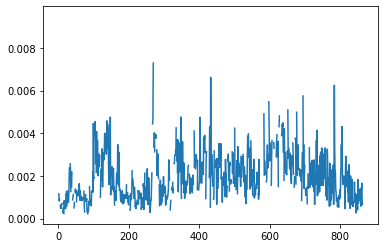

In [91]:
plt.plot(tau1)


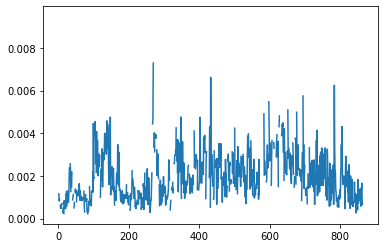

In [111]:
plt.plot(tau2)

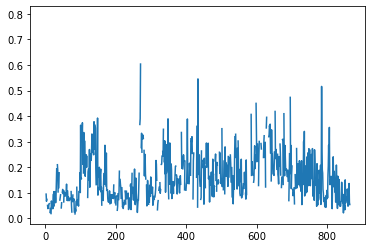

In [76]:
plt.plot(tau_nov['ustar_30m'])

In [82]:
tau_nov['tref_30m']

0      10.594876
1      10.596407
2      10.531177
3      10.531900
4      10.514788
         ...    
860    12.632076
861    12.622191
862    12.648414
863    12.697174
864    12.698508
Name: tref_30m, Length: 865, dtype: float64

In [83]:
tau_nov['temp_Avg(2)']

0      0.034
1      0.052
2      0.059
3      0.045
4      0.002
       ...  
860    1.351
861    1.332
862    1.332
863    1.337
864    1.374
Name: temp_Avg(2), Length: 865, dtype: float64